<img src="../ancillarydata/logos/climbeco_course_logo.png" width="1000" align="left"/>

<br>
<br>
<br>
<br>
<br>

<br>
<br>


# <font color=#800000> Exercise 2</font>  
## _Vegetation modelling & inverse modelling_


## <font color=#800000> Task 1</font> - Compare vegetation model output to observations
#### Before starting, have a look at the _Station_example.ipynb_ notebook.<br> Check how you can create a station object and store different datasets, create a plot, etc.

1. Read LPJ-GUESS output data for a specific station into a Pandas DataFrame.

2. Read FLUXNET data (real observations) for the same station into a Pandas DataFrame.

3. Plot both datasets in the same matplotlib plot (see exercise1).

4. Calculate mean and st dev. Include [envelope -- > fill_between](https://stackoverflow.com/questions/12957582/plot-yerr-xerr-as-shaded-region-rather-than-error-bars) for e.g. standard deviation? 

<img src="../ancillarydata/images/exercise2/exercise2.png" width='750'></img>

5. Compare vegetation-model output & observations by computing the correlation. This step is optional and requires data harmonization. Both datasets should have the same temporal resolution. 

### Preparation I - Import modules

In [1]:
#from tools import read_fluxnet_dd, read_fluxnet_hh
%run ./tools.ipynb

Loading BokehJS ...

### Preparation II - Create  a Station Object
Possible properties you get from station:
- info (Station Information as List)
- code (the station code, useful to extract information)
- eco_var_name (The name of data you store in the object) &nbsp;&nbsp; <b>You</b> are responsible to be consistent in what you store.
- lon (longitude, useful to extract information from maps)
- lat (latitude, useful to extract information from maps)


For the following variables, you need to store data first to the station, before you can access it.
- lpj (LPJ-Guess data)
- lpjmap (LPJ-Guess Map data)
- fluxnet (FLUXNET data from exercise 1)
- lumia (LUMIA inversion results)

In [2]:
# Create a station object for Hyltemossa:
myStation = Station('Htm', 'gpp')

# Show station info with:
# an item of info can be extracted with the index. For example the country with:
# myStation.info[1]
myStation.info

['Hyltemossa',
 'Sweden',
 'SE',
 'Coniferous forest',
 56.09763,
 13.41897,
 'http://www.europe-fluxdata.eu/home/site-details?id=SE-Htm',
 56.25,
 13.25]

In [3]:
#Get the station name from your station object:
myStation.info[0]


'Hyltemossa'

In [4]:
#Get the station latitude from your station object:
myStation.info[8]

13.25

<br>

### <font color=#800000> Task 1.1 </font> - Import LPJGUESS model output to your station object

#### Import LPJ-GUESS model results:
LPJ-GUESS was run for the individual [stations](../ancillarydata/docs/climbeco_course_station_list.png) using as input the observed meteorological data from FLUXNET
- air temperature
- incoming shortwave radiation
- precipitation
<br>

Output is daily values of the following fluxes in units of kgC/m2/day
- gpp  (gross primary productivity)
- nee  (net ecosystem exchange)
- rtot  (total ecosystem respiration)
<br>

The model was run twice for each station. 
The first run, called "pnv" below, had no restrictions or adaptations to the site conditions apart from using the observed meteorological data from FLUXNET.
All the model's potential plant functional types (PFTs) could establish and compete. This is Potential Natural Vegetation (PNV).

The second run for each station restricted the PFTs that could potentially establish to PFTs similar to those observed near the stations.<br>
There are three categories:

|           | coniferous    |deciduous  |grass_wet_crop|
|:---------|:---------|:---------|:---------|
|**PFT simulated:**|Spruce, Pine and grasses|Birch, Hornbeam, Hazel, Beech, Ash, Poplar, Oak, Lime, Elm and grasses|Grasses only (because the version of the model used does not have wetland, cropland and pasture stands)|
||||
|**Stations:**| NL-Loo | DK-Sor | FI-Let |
|             | SE-Htm | DE-Hai | FI-Sii |
|             | SE-Nor | DE-HoH | DE-Akm |
|             | SE-Ros |        | DE-Geb |
|             | SE-Svb |        | DE-Gri |
|             |        |        | DE-Hte |
|             |        |        | DE-RuR |
|             |        |        | DE-RuS |
|             |        |        | SE-Deg |
|             |        |        | SE-Lnn  |

 

<br>

#### How to select from different LPJ-GUESS model results:
Use the following variables as input parameters to the function that reads LPJ-GUESS output:

LPJ-GUESS Vegetation Types:
- Use pnv to begin with

LPJ-GUES Ecosystem Variables:
- gpp
- nee
- rtot

Stations: <br>
Pick two stations for your analysis. Choose one station dominated by forests (one of the coniferous or deciduous) sites, and one from the grass_wet_crop category.
<br>
<br>
*Confer with your course colleagues to avoid overlap!*
<br>
<br>


In [5]:
#Read LPJ-data to a Pandas DataFrame and store in station obj:
myStation.lpj=read_lpjguess_st('pnv', 'gpp', myStation.code)

#Show DataFrame:
myStation.lpj.head()

,Lon,Lat,Year,Day,Value,time
18980,13.25,56.25,2015,1,0.000026,2015-01-01
18981,13.25,56.25,2015,2,0.000114,2015-01-02
18982,13.25,56.25,2015,3,0.000139,2015-01-03
18983,13.25,56.25,2015,4,0.000126,2015-01-04
18984,13.25,56.25,2015,5,0.000032,2015-01-05


In [6]:
#Set 'time' as index:
myStation.lpj.set_index('time', drop=False, inplace=True)

#Show dataframe:
myStation.lpj.head()

,Lon,Lat,Year,Day,Value,time
time,,,,,,
2015-01-01,13.25,56.25,2015,1,0.000026,2015-01-01
2015-01-02,13.25,56.25,2015,2,0.000114,2015-01-02
2015-01-03,13.25,56.25,2015,3,0.000139,2015-01-03
2015-01-04,13.25,56.25,2015,4,0.000126,2015-01-04
2015-01-05,13.25,56.25,2015,5,0.000032,2015-01-05


### <font color=#800000> Task 1.2 </font> - Read FLUXNET data
From exercise 1 we already know that the fluxes in the FLUXNET dataset are in gC/m2/d.

In [7]:
#Read FLUXNET-data:
myStation.fluxnet=read_fluxnet_dd("~/climbeco/data/fluxnet/obs_dd/" , myStation.code)

#Set 'time' as index:
myStation.fluxnet.set_index('TIMESTAMP', drop=False, inplace=True)

#Show DataFrame:
myStation.fluxnet.head()

,TIMESTAMP,TA_F,TA_F_NIGHT,TA_F_DAY,SW_IN_F,LW_IN_JSB_F,VPD_F,PA_F,P_F,P_F_QC,...,NEE_VUT_REF_DAY_SD,NEE_VUT_REF_DAY_QC,RECO_NT_VUT_MEAN,RECO_NT_VUT_SE,GPP_NT_VUT_MEAN,GPP_NT_VUT_SE,RECO_DT_VUT_MEAN,RECO_DT_VUT_SE,GPP_DT_VUT_MEAN,GPP_DT_VUT_SE
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,3.997,3.649,4.761,2.445,330.233,0.326,101.168,4.619,1.0,...,0.195473,1.0,1.43062,0.056245,0.269185,0.008435,1.602720,0.048518,0.251264,0.002151
2015-01-02,2015-01-02,4.416,3.846,5.670,10.805,299.865,1.003,99.329,3.712,1.0,...,1.373100,1.0,1.45113,0.056956,0.998244,0.045417,1.733150,0.052467,0.740120,0.005448
2015-01-03,2015-01-03,3.201,3.099,3.425,19.601,249.483,1.275,99.500,0.000,1.0,...,1.692590,1.0,1.39127,0.054877,1.775470,0.049168,1.403660,0.042493,1.050170,0.007493
2015-01-04,2015-01-04,1.735,1.300,2.694,30.192,207.113,2.250,100.585,0.000,1.0,...,2.014010,0.8,1.31827,0.052345,1.849130,0.048160,1.102890,0.033387,1.313990,0.009381
2015-01-05,2015-01-05,0.427,0.575,0.100,12.005,229.315,1.048,101.463,0.000,1.0,...,1.619100,1.0,1.25290,0.050095,1.646670,0.046840,0.864469,0.026170,0.818615,0.006011


<br>

### <font color=#800000> Task 1.3 </font> - Plot datasets

<font color='blue'>OBS! What about units? The GPP-unit for FLUXNET-data is gC/m2/d. LPJ-GUESS GPP-output is in KgC/m2/d.</font>

In [8]:
#Update your lpjguess-gpp value:
myStation.lpj.Value=myStation.lpj.Value*1000

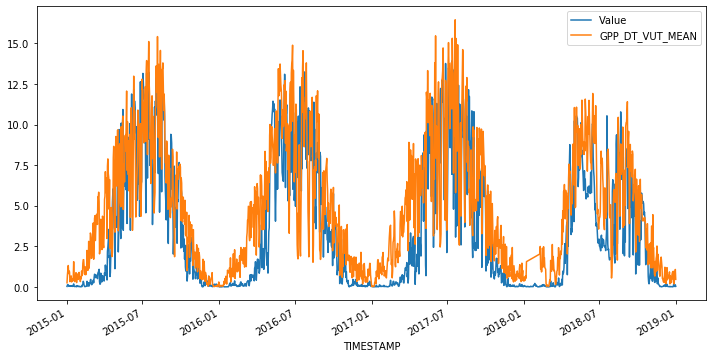

In [9]:
#Create a plot (i.e. "figure") object and set the size of your plot:
ax = myStation.lpj.plot('time','Value', figsize=(12,6))
myStation.fluxnet.plot('TIMESTAMP','GPP_DT_VUT_MEAN', ax=ax)

<br>

### <font color=#800000> Task 1.4 </font> - Calculate Mean & Std Deviation (plot results)
You need to harmonize your datasets before you can compare them. Here we provide an example of how you can aggregate a dataset to monthly means and then compute standard deviation as a first measure of uncertainty.

In [10]:
#Calculate montly mean:
myStation_lpj_monthly_mean = myStation.lpj.Value.resample('M', label='left', loffset='15d').mean().dropna()

#Calculate standard deviation:
myStation_lpj_monthly_std = myStation.lpj.Value.resample('M', label='left', loffset='15d').std().dropna()

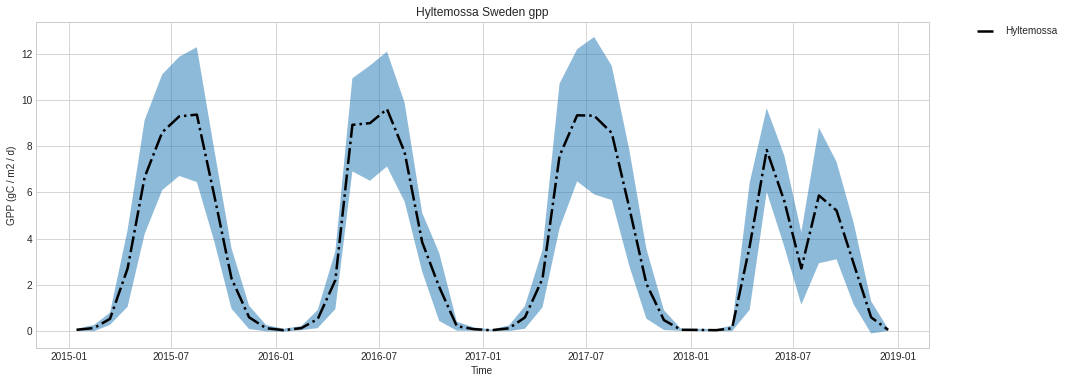

In [11]:
#Create plot with st dev of monthly means

#Set variables:
x = myStation_lpj_monthly_mean.index
y = myStation_lpj_monthly_mean
error = myStation_lpj_monthly_std

#Add grid:
plt.style.use('seaborn-whitegrid')

#Create a plot (i.e. "figure") object and set the size of your plot:
fig = plt.figure(figsize=(16, 6))

#Add plot title:
plt.title(" ".join([myStation.info[0],myStation.info[1],myStation.eco_var_name]))

#Plot values for Hyltemossa:
plt.plot(x, y,
         linestyle = '-.', linewidth = 2.5, color = 'black',
         label = myStation.info[0])

#Add envelope:
plt.fill_between(x, y-error, y+error, alpha=0.5)

#Add x-axis label:
plt.xlabel('Time')

#Add y-axis label:
plt.ylabel('GPP (gC / m2 / d)')

#Add legend:
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


<br>

### <font color=#800000> Task 1.5 </font> - Compute correlation and RMSE of the hourly time series
Compare vegetation-model output & observations by computing the correlation and RMSE (Root Mean Square Error). <br>
This step requires data harmonization. Both datasets should have the same temporal resolution (i.e. time index). To compute the correlation between the time series, you need to put both datasets in the same dataframe.


In [12]:
#Concatenate dataframes:
df_combined = pd.concat([myStation.fluxnet['GPP_DT_VUT_MEAN'], myStation.lpj['Value']], axis=1)

#Show dataframe:
df_combined.head()

,GPP_DT_VUT_MEAN,Value
2015-01-01,0.251264,0.026368
2015-01-02,0.740120,0.114230
2015-01-03,1.050170,0.138699
2015-01-04,1.313990,0.126410
2015-01-05,0.818615,0.031555


#### Correlation 

In [13]:
#Compute correlation:
df_combined.corr(method='pearson')

,GPP_DT_VUT_MEAN,Value
GPP_DT_VUT_MEAN,1.00000,0.86988
Value,0.86988,1.00000


#### Root Mean Square Error

In [14]:
#Function that computes RMSE between two Pandas Series or two NumPy arrays:
def rmse(predictions, targets):
    return np.sqrt(np.nanmean((predictions - targets) ** 2))

In [15]:
#Call function to compute RMSE between LPJ-GUESS GPP model output & GPP observations:
rmse(myStation.lpj['Value'], myStation.fluxnet['GPP_DT_VUT_MEAN'])

2.353576924945965

### Questions to answer: 

How well does the model represent the observed biospheric fluxes, i.e. NEE, GPP, RTOT?

Does the model capture observed flux anomalies from the drought event in 2018? 

How is the seasonal performance? Are summers better represented than winter months?

Compare the results from pnv to those from the second run for each station you considered. Do the restrictions placed on the PFTs improve the results?
 
How to quantitatively evaluate model performance?

Are some time scales represented by the model better than others? <br>
e.g. seasonal cycle vs. variability within a month

<br>

In [16]:
#Continue writing your own code...


<br>

## <font color=#800000> Task 2 </font> - Add vegetation-model output on a map to the comparison
In this part you will inspect LPJ-GUESS fluxes on a map. The model was run on a grid covering Europe. <br>
In these runs the meteorological and biophysical input data are no longer direct observations. Instead objective reanalysis of meteorological observations provided by meteorological services like [ECMWF](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5) (European Centre for Medium-Range Weather Forecast) or [NCEP](https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html) (National Certers for Environmental Prediction).

LPJ-GUESS fluxes are stored in netCDF-files and read into a multi-dimensional array (NumPy array).
The netCDF-file also includes sepparate data with the latitudes and longitudes of the fluxes.
You will use an already existent function to plot the fluxes.



### <font color=#800000> Task 2.1 </font> - Inspect the LPJ-GUESS maps

Compare NEE, GPP and Respiration for different seasons and different times of day. 



In [17]:
#Call function to display widget-form:
create_widget_form_multi_maps()

Output()


### <font color=#800000> Task 2.2 </font> -  Extract time-series from netCDF with vegetation-model output 
This exercises focuses on how to extract time-series of values for a specific location (given in lat/lon) from the map. <br> 
You will use already prepared functions to:

1. Read netCDF with LPJ-GUESS model output

2. Extract time-series of fluxes for a given location in lat/lon stored in your myStation object (read this [file](../ancillarydata/docs/climbeco_course_station_list.pdf) to get station location info).

3. Add extracted time-series as Pandas DataFrame to your station object.


In [18]:
# LPJ-GUESS maps 6-hourly fluxes
lon_LPJmap, lat_LPJmap, time_LPJmap, nee_LPJmap, gpp_LPJmap, rtot_LPJmap, cell_area_LPJmap, flux_units_LPJmap, description_LPJmap = read_LPJ_fluxmap_2()

In [19]:
# The extracted data contains all Europe. Extract the values for your station
# extract time series for station / grid cell
i,j = lonlat_2_ixjy(myStation.lon,myStation.lat ,lon_LPJmap,lat_LPJmap)

#Extract time series for given index:
myStation_nee = nee_LPJmap[:,j,i]

# we need area of this specific grid cell later for the conversion from per gridcell to per m2
myStation_area = cell_area_LPJmap[j,i]

# create a pandas dataframe and store this into your station
myStation.lpjmap = pd.DataFrame({'LPJGUESS_NEE':myStation_nee, 'time':time_LPJmap})
myStation.lpjmap.set_index('time', drop=False, inplace=True)
myStation.lpjmap

,LPJGUESS_NEE,time
time,,
2015-01-01 03:00:00,1.894334e+06,2015-01-01 03:00:00
2015-01-01 09:00:00,1.875540e+06,2015-01-01 09:00:00
2015-01-01 15:00:00,2.054206e+06,2015-01-01 15:00:00
2015-01-01 21:00:00,1.970556e+06,2015-01-01 21:00:00
2015-01-02 03:00:00,2.020740e+06,2015-01-02 03:00:00
...,...,...
2018-12-30 21:00:00,1.516991e+06,2018-12-30 21:00:00
2018-12-31 03:00:00,1.375016e+03,2018-12-31 03:00:00
2018-12-31 09:00:00,1.375016e+03,2018-12-31 09:00:00


### ! STOP did you do the right thing?<br>
- If you just followed all the examples, you probably want to compare GPP, but you have stored NEE in your station...

In [20]:
#Get LPJGUESS-map data for selected index:
myStation_gpp = gpp_LPJmap[:,j,i]

# we need area of this specific grid cell later for the conversion from per gridcell to per m2
myStation_area = cell_area_LPJmap[j,i]

# create a pandas dataframe and store this into your station
myStation.lpjmap = pd.DataFrame({'LPJGUESS_GPP':myStation_gpp, 'time':time_LPJmap})
myStation.lpjmap.set_index('time', drop=False, inplace=True)
myStation.lpjmap

,LPJGUESS_GPP,time
time,,
2015-01-01 03:00:00,-0.000000,2015-01-01 03:00:00
2015-01-01 09:00:00,-101213.703125,2015-01-01 09:00:00
2015-01-01 15:00:00,-72805.507812,2015-01-01 15:00:00
2015-01-01 21:00:00,-2009.001953,2015-01-01 21:00:00
2015-01-02 03:00:00,-0.000000,2015-01-02 03:00:00
...,...,...
2018-12-30 21:00:00,-662.258423,2018-12-30 21:00:00
2018-12-31 03:00:00,-0.000000,2018-12-31 03:00:00
2018-12-31 09:00:00,-0.000000,2018-12-31 09:00:00



<br>

### <font color=#800000> Task 2.2 </font> -  Harmonize vegetation-model output (time-series) with observations
Before you plot the time series that you extracted from the LPJ-GUESS map with the FLUXNET observations, you need to make sure that both datasets have the same temporal resolution. The LPJ-GUESS map has a temporal resolution of 6 hours. The FLUXNET observations are available in two temporal resolutions; half-hourly and daily.

Pandas DataFrames in Python include a wide range of built-in functions for aggregating data based on time (e.g. ```df.resample('M').mean()```, if the Pandas DataFrame has a column of dateTime objects as index).


In [21]:
#Continue writing your own code based on examples in previous tasks...



<br>

### <font color=#800000> Task 2.3 </font> -  Plot vegetation-model output time-series with observations
In this exercise you will choose a station and create a matplotlib plot containing:

1. LPJ-GUESS model output - specific station model output

2. LPJ-GUESS model output - extracted time-series from map

3. Fluxnet observations

<br>

go to the station_example or exercise1 notebook to see how to use the matplotlib library

in the following a quick and dirty plot which is missing the title, and the units...
 

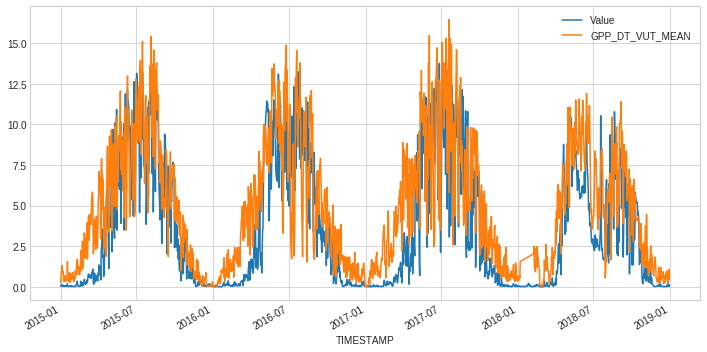

In [22]:
#Create a plot (i.e. "figure") object and set the size of your plot:
ax = myStation.lpj.plot('time','Value', figsize=(12,6))
myStation.fluxnet.plot('TIMESTAMP','GPP_DT_VUT_MEAN', ax=ax)

In [23]:
#Add your own code here:


<br>

## <font color=#800000> Task 3 </font> - Add inverse modelling output from LUMIA in the comparison
Now you will plot all the datasets you have prepared in the previous steps into one plot.
The LUMIA inverse modelling output has a temporal resolution of one month.

1. Look at LUMIA-maps. Inspect prior, posterior and difference.

2. Read netCDF-files with LUMIA posterior info.

3. Extract time-series for given location (lat/lon) ---> code ready.

4. Read extracted time-series into Pandas DataFrames.

5. Harmonize Pandas DataFrame with LUMIA time-series to comply with the temporal resolution of the other datasets.

6. Plot LPJ-GUESS model ouput, LPJ-GUESS time-series from maps, FLUXNET observations and LUMIA time-series using matplotlib.

7. Consider ways of calculating the difference between the datasets and reflect on why differences occur.
 

<br>

### <font color=#800000> Task 3.1 </font> - Inspect the LUMIA prior and posterior flux maps


In [24]:
#Call function to display LUMIA maps:
create_widget_form_multi_maps_lumia()

Output()

### <font color=#800000> Task 3.2 </font> -  Extract time-series from LUMIA output

In [25]:
#Get LUMIA monthly fluxes (read netcdf):
lon_LUMIA,lat_LUMIA,time_LUMIA,bio_prior_LUMIA_map,bio_poste_LUMIA_map,oce_LUMIA_map,ff_LUMIA_map,cell_area_LUMIA_map,flux_units_LUMIA,comment = read_EUROCOM_drought_fluxmap(path_lumia+'co2flux_monthly_lumia_core_2009_2018.nc')

#### Extract LUMIA time series for given location (lat/lon)
The imported data contains all Europe.
Now, we will extract LUMIA values for one station.

In [26]:
#Enter the lat/lon of your station in lonlat_2_ixjy()
#and get the index-values for the corresponding grid-cell in the LUMIA array:
lumia_i,lumia_j = lonlat_2_ixjy(myStation.lon, myStation.lat ,lon_LUMIA, lat_LUMIA)

#Call function to extracting time series for your station/grid-cell:
myStation_lumia = bio_poste_LUMIA_map[:,lumia_j,lumia_i]

### <font color=#800000> Task 3.3 </font> - Store extracted LUMIA time series to Pandas DataFrame in your station object

In [27]:
#Store the extracted LUMIA time series in a Pandas DataFrame and store this into your station object:
myStation.lumia = pd.DataFrame({'LUMIA_POSTERIOR':myStation_lumia, 'time':time_LUMIA})

#Set "time" as index:
myStation.lumia.set_index('time', drop=False, inplace=True)

#Show dataframe:
myStation.lumia.head()

,LUMIA_POSTERIOR,time
time,,
2009-01-15,0.000033,2009-01-15
2009-02-15,0.000024,2009-02-15
2009-03-15,0.000043,2009-03-15
2009-04-15,-0.000018,2009-04-15
2009-05-15,-0.000069,2009-05-15


### <font color=#800000> Task 3.4 </font> - Finally analyse and compare all time series 
Now that you have explored the different datasets we will start a final comparison of all of them. For this purpose a new myStation object will be created to make sure that the same station and the same variable is compared.

In [28]:
#Create new myStation object and store all model results for this station.
#This example is for nee only.

#Create a station object for your station:
myStation_obj = Station('Htm', 'nee')

#Read LPJ-data to a Pandas DataFrame and store in station obj:
myStation_obj.lpj=read_lpjguess_st('pnv', 'nee', myStation_obj.code)
myStation_obj.lpj.set_index('time', drop=False, inplace=True)
myStation_obj.lpj.rename(columns={"Value": "LPJGUESSst_NEE"}, inplace=True)

#Read FLUXNET-data to a Pandas DataFrame and store in station obj:
myStation_obj.fluxnet=read_fluxnet_dd("~/climbeco/data/fluxnet/obs_dd/" , myStation_obj.code)
myStation_obj.fluxnet.set_index('TIMESTAMP', drop=False, inplace=True)

#create a pandas dataframe and store LPJ-GUESS map results into your station
i,j = lonlat_2_ixjy(myStation_obj.lon,myStation_obj.lat ,lon_LPJmap,lat_LPJmap)
myStation_nee = nee_LPJmap[:,j,i]
myStation_area = cell_area_LPJmap[j,i]
myStation_obj.lpjmap = pd.DataFrame({'LPJGUESSmap_NEE':myStation_nee, 'time':time_LPJmap})
myStation_obj.lpjmap.set_index('time', drop=False, inplace=True)

#create a pandas dataframe and store LUMIA results into your station
lumia_i,lumia_j = lonlat_2_ixjy(myStation_obj.lon, myStation_obj.lat ,lon_LUMIA, lat_LUMIA)
myStation_obj.lumia = pd.DataFrame({'LUMIA_POSTERIOR':bio_poste_LUMIA_map[:,lumia_j,lumia_i], 'time':time_LUMIA})
myStation_obj.lumia.set_index('time', drop=False, inplace=True)


In [29]:
#Resample FLUXNET-values to monthly means:
nee_flux_monthly_means = myStation_obj.fluxnet.NEE_VUT_MEAN.resample('M', label='left', loffset='15d').mean()

#Resample LPJ-GUESS model output to monthly means: 
nee_lpj_monthly_means = myStation_obj.lpj.LPJGUESSst_NEE.resample('M', label='left', loffset='15d').mean()

#Resample LPJ-GUESS map to monthly means: 
nee_lpjmap_monthly_means = myStation_obj.lpjmap.LPJGUESSmap_NEE.resample('M',  label='left', loffset='15d').mean()

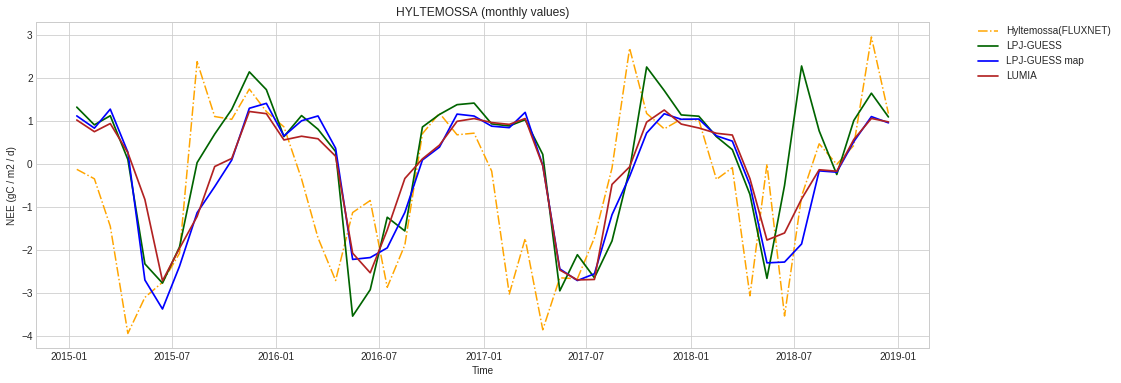

In [30]:
#Add grid:
plt.style.use('seaborn-whitegrid')

#Create a plot (i.e. "figure") object and set the size of your plot:
fig = plt.figure(figsize=(16, 6))

#Add plot title:
plt.title(myStation_obj.info[0].upper()+' (monthly values)')

#Plot values for FLUXNET:
plt.plot(nee_flux_monthly_means.index, nee_flux_monthly_means,
         linestyle = '-.', linewidth = 1.5, color = 'orange',
         label = myStation_obj.info[0]+'(FLUXNET)')

#Plot values for LPJ-GUESS:
plt.plot(nee_lpj_monthly_means.index, nee_lpj_monthly_means*1000*(-1),#need to switch sign here to follow the same convention as in the other datsets (positive flux = into the atmosphere)
         linestyle = '-', linewidth = 1.7, color = 'darkgreen',
         label = 'LPJ-GUESS')

#Plot values for LPJ-GUESS map:
plt.plot(nee_lpjmap_monthly_means.index, nee_lpjmap_monthly_means*1000.*12/44.*4./myStation_area,
         linestyle = '-', linewidth = 1.7, color = 'blue',
         label = 'LPJ-GUESS map')

#Plot values for LUMIA:
plt.plot(myStation.lumia[datetime(2014,12,31):datetime(2018,12,31)].index.values, myStation.lumia[datetime(2014,12,31):datetime(2018,12,31)].LUMIA_POSTERIOR*1000.*24.,
         linestyle = '-', linewidth = 1.7, color = 'firebrick',
         label = 'LUMIA')

#Add x-axis label:
plt.xlabel('Time')

#Add y-axis label:
plt.ylabel('NEE (gC / m2 / d)')

#Add legend:
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#Show plot:
plt.show()

In [31]:
#Harmonize all four datasets

#Concatenate dataframes:
df_combined = pd.concat([nee_flux_monthly_means, 
                         nee_lpj_monthly_means*1000.*(-1), 
                         nee_lpjmap_monthly_means*1000.*12/44.*4./myStation_area, 
                         myStation.lumia[datetime(2014,12,31):datetime(2018,12,31)].LUMIA_POSTERIOR*1000.*24.], axis=1)

#Show dataframe:
df_combined.tail()
df_combined.loc[(df_combined.index > datetime(2017,3,1)) & (df_combined.index < datetime(2017,12,1))]

,NEE_VUT_MEAN,LPJGUESSst_NEE,LPJGUESSmap_NEE,LUMIA_POSTERIOR
2017-03-15,-1.731497,1.033945,1.205179,1.061831
2017-04-15,-3.850807,0.227507,-0.027368,-0.036401
2017-05-15,-2.642632,-2.945161,-2.434177,-2.460697
2017-06-15,-2.664540,-2.105546,-2.705905,-2.691292
2017-07-15,-1.711957,-2.641453,-2.549201,-2.680742
2017-08-15,-0.090812,-1.785478,-1.175483,-0.470238
2017-09-15,2.695406,-0.129025,-0.285278,-0.062256
2017-10-15,1.180406,2.259589,0.725185,0.978065
2017-11-15,0.821067,1.712333,1.172377,1.259155


In [32]:
#Compute correlation:
df_combined.corr(method='pearson')

,NEE_VUT_MEAN,LPJGUESSst_NEE,LPJGUESSmap_NEE,LUMIA_POSTERIOR
NEE_VUT_MEAN,1.000000,0.508115,0.470395,0.458114
LPJGUESSst_NEE,0.508115,1.000000,0.860246,0.879397
LPJGUESSmap_NEE,0.470395,0.860246,1.000000,0.963103
LUMIA_POSTERIOR,0.458114,0.879397,0.963103,1.000000


In [33]:
#Continue writing your own code...

<br>
<br>
<br>
<br>
<img src="../ancillarydata/logos/climbeco_contributors_logo.png" width="1000" align="left"/>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>